In [40]:
# Télécharger les packages
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [41]:
products = pd.read_csv('amazon_baby.csv')

In [42]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
name      183213 non-null object
review    182702 non-null object
rating    183531 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [43]:
# Explorer les données
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [44]:
products['name'].head()

0                             Planetwise Flannel Wipes
1                                Planetwise Wipe Pouch
2                  Annas Dream Full Quilt with 2 Shams
3    Stop Pacifier Sucking without tears with Thumb...
4    Stop Pacifier Sucking without tears with Thumb...
Name: name, dtype: object

In [45]:
#Explore Vulli Sophie

In [46]:
giraffe_reviews=products[products['name']=='Vulli Sophie the Giraffe Teether']

In [47]:
giraffe_reviews.shape

(785, 3)

In [48]:
giraffe_reviews.head()

,name,review,rating
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5


In [49]:
#Build a sentiment classifier

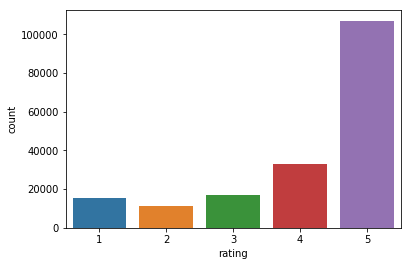

In [50]:
sns.countplot(x = 'rating' , data = products)

In [51]:
##Define what's a positive and negative sentiment
#ignore all 3* reviews
products = products[products['rating'] != 3]

In [52]:
#postitive sentiment=4* or 5*
products['sentiment']=products['rating']>=4
products['sentiment'] = products['sentiment'].apply(lambda x: 1 if x==True else 0)

In [53]:
products.head()

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,1


# TF-IDF

### Supprimer les données manquantes

In [54]:
products = products[products['review'].isna()!=True]

In [55]:
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer 

In [56]:
stop_words = stopwords.words('english')

In [69]:
import re
def text_process(com):
    """
    Prend une chaîne de texte, puis effectue les opérations suivantes :
    1. Enlever toute ponctuation
    2. Supprimer tous les mots d'arrêt
    3. Renvoie une liste du texte nettoyé.
    """
    # Check characters to see if they are in punctuation
    #nopunc = re.sub('['+string.punctuation+']', '', com) # ou 
    nopunc = [char for char in com if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    #return [word for word in nopunc.split() if not word.lower() in stop_words]
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [70]:
products['review'].head(15).apply(text_process)

1     [came, early, disappointed, love, planet, wise...
2     [soft, comfortable, warmer, looksfit, full, si...
3     [product, well, worth, purchase, found, anythi...
4     [kids, cried, nonstop, tried, ween, pacifier, ...
5     [Binky, Fairy, came, house, didnt, special, gi...
6     [Lovely, book, bound, tightly, may, able, add,...
7     [Perfect, new, parents, able, keep, track, bab...
8     [friend, mine, pinned, product, Pinterest, dec...
9     [easy, way, nanny, record, key, events, happen...
10    [love, journal, nanny, uses, everyday, track, ...
11    [book, perfect, Im, first, time, new, mom, boo...
12    [originally, gave, nanny, pad, paper, write, i...
14    [Space, monthly, photos, info, lot, useful, st...
15    [bought, calender, second, son, colorful, room...
16    [love, little, calender, keep, track, babys, f...
Name: review, dtype: object

In [82]:
#products['commentaire'] = products['review'].apply(text_process)

In [83]:
import re
from nltk.stem.snowball import SnowballStemmer

#com = SnowballStemmer("english")
products['commentaire'] = products['review'].map(lambda x: re.sub('['+string.punctuation+']', '', x))
#products['commentaire'] = products['commentaire'].map(lambda x: re.sub('['+string.whitespace+']', '', x))
products['commentaire'] = products['commentaire'].map(lambda x : [word for word in x.split() if not word.lower() in stop_words])

In [63]:
string.whitespace

' \t\n\r\x0b\x0c'

In [64]:
#test = products[1:5000]
#var = CountVectorizer(analyzer=text_process).fit(test['review'])
#X = var.transform(test['review'])
#y = test['sentiment']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#logreg = LogisticRegression()
#logreg.fit(X_train,y_train)
#predictions = logreg.predict(X_test)
#from sklearn.metrics import classification_report
#print(classification_report(y_test,predictions))

# Normalisation de la matrice

In [98]:
var = CountVectorizer(analyzer=text_process).fit(products['commentaire'])
#var = CountVectorizer(min_df=.0025, max_df=.1, ngram_range=(1,2))
#var = var.fit(products['commentaire'])
# Imprimer le nombre total de mots de vocabulaire
print(len(var.vocabulary_))

165803


In [102]:
var.transform(products['commentaire'][1:10])

<9x165803 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [ ]:
y = products['sentiment']
X = var.transform(products['commentaire'])
print(X.shape)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#Let training the sentiment classifier

In [107]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
predictions = model.predict(X_test)

In [109]:
#Evaluate the sentiment model

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      6568
          1       0.84      1.00      0.91     34926

avg / total       0.71      0.84      0.77     41494



C:\Users\sadaouih\AppData\Local\Continuum\anaconda3\envs\dscience-env\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Applying the learned model to understand sentiment for giraffe

In [ ]:
giraffe_reviews.head()

In [134]:
## sort rhe reviews based on the predicted sentiment and explore 

In [135]:
giraffe_reviews=giraffe_reviews.sort('predicted_sentiment',ascending=False)

In [137]:
giraffe_reviews.shape

(785, 5)

In [138]:
giraffe_reviews[0]

{'name': 'Vulli Sophie the Giraffe Teether',
 'predicted_sentiment': 1.0,
 'rating': 5.0,
 'review': "Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots tha

In [139]:
giraffe_reviews[1]['review']

"I'm not sure why Sophie is such a hit with the little ones, but my 7 month old baby girl is one of her adoring fans.  The rubber is softer and more pleasant to handle, and my daughter has enjoyed chewing on her legs and the nubs on her head even before she started teething.  She also loves the squeak that Sophie makes when you squeeze her.  Not sure what it is but if Sophie is amongst a pile of her other toys, my daughter will more often than not reach for Sophie.  And I have the peace of mind of knowing that only edible and safe paints and materials have been used to make Sophie, as opposed to Bright Starts and other baby toys made in China.  Now that the research is out on phthalates and other toxic substances in baby toys, I think it's more important than ever to find good quality toys that are also safe for our babies to handle and put in their mouths.  Sophie is a must-have for every new mom in my opinion.  Even if your kid is one of the few that can take or leave her, it's worth

In [140]:
#Show most negative reviews

In [141]:
giraffe_reviews[-1]['review']

"My son (now 2.5) LOVED his Sophie, and I bought one for every baby shower I've gone to. Now, my daughter (6 months) just today nearly choked on it and I will never give it to her again. Had I not been within hearing range it could have been fatal. The strange sound she was making caught my attention and when I went to her and found the front curved leg shoved well down her throat and her face a purply/blue I panicked. I pulled it out and she vomited all over the carpet before screaming her head off. I can't believe how my opinion of this toy has changed from a must-have to a must-not-use. Please don't disregard any of the choking hazard comments, they are not over exaggerated!"

In [143]:
#---------------------------------------- Exercice -------------------------------------
#---------------------------------------------------------------------------------------
#Read some product review
products=gl.SFrame('C:/Users/sadaouih/Desktop/Machine learning specialization/Machine Learning Foundations/Week 3/amazon_baby.gl/')

In [144]:
products['word_count']=gl.text_analytics.count_words(products['review'])
gl.canvas.set_target('ipynb')